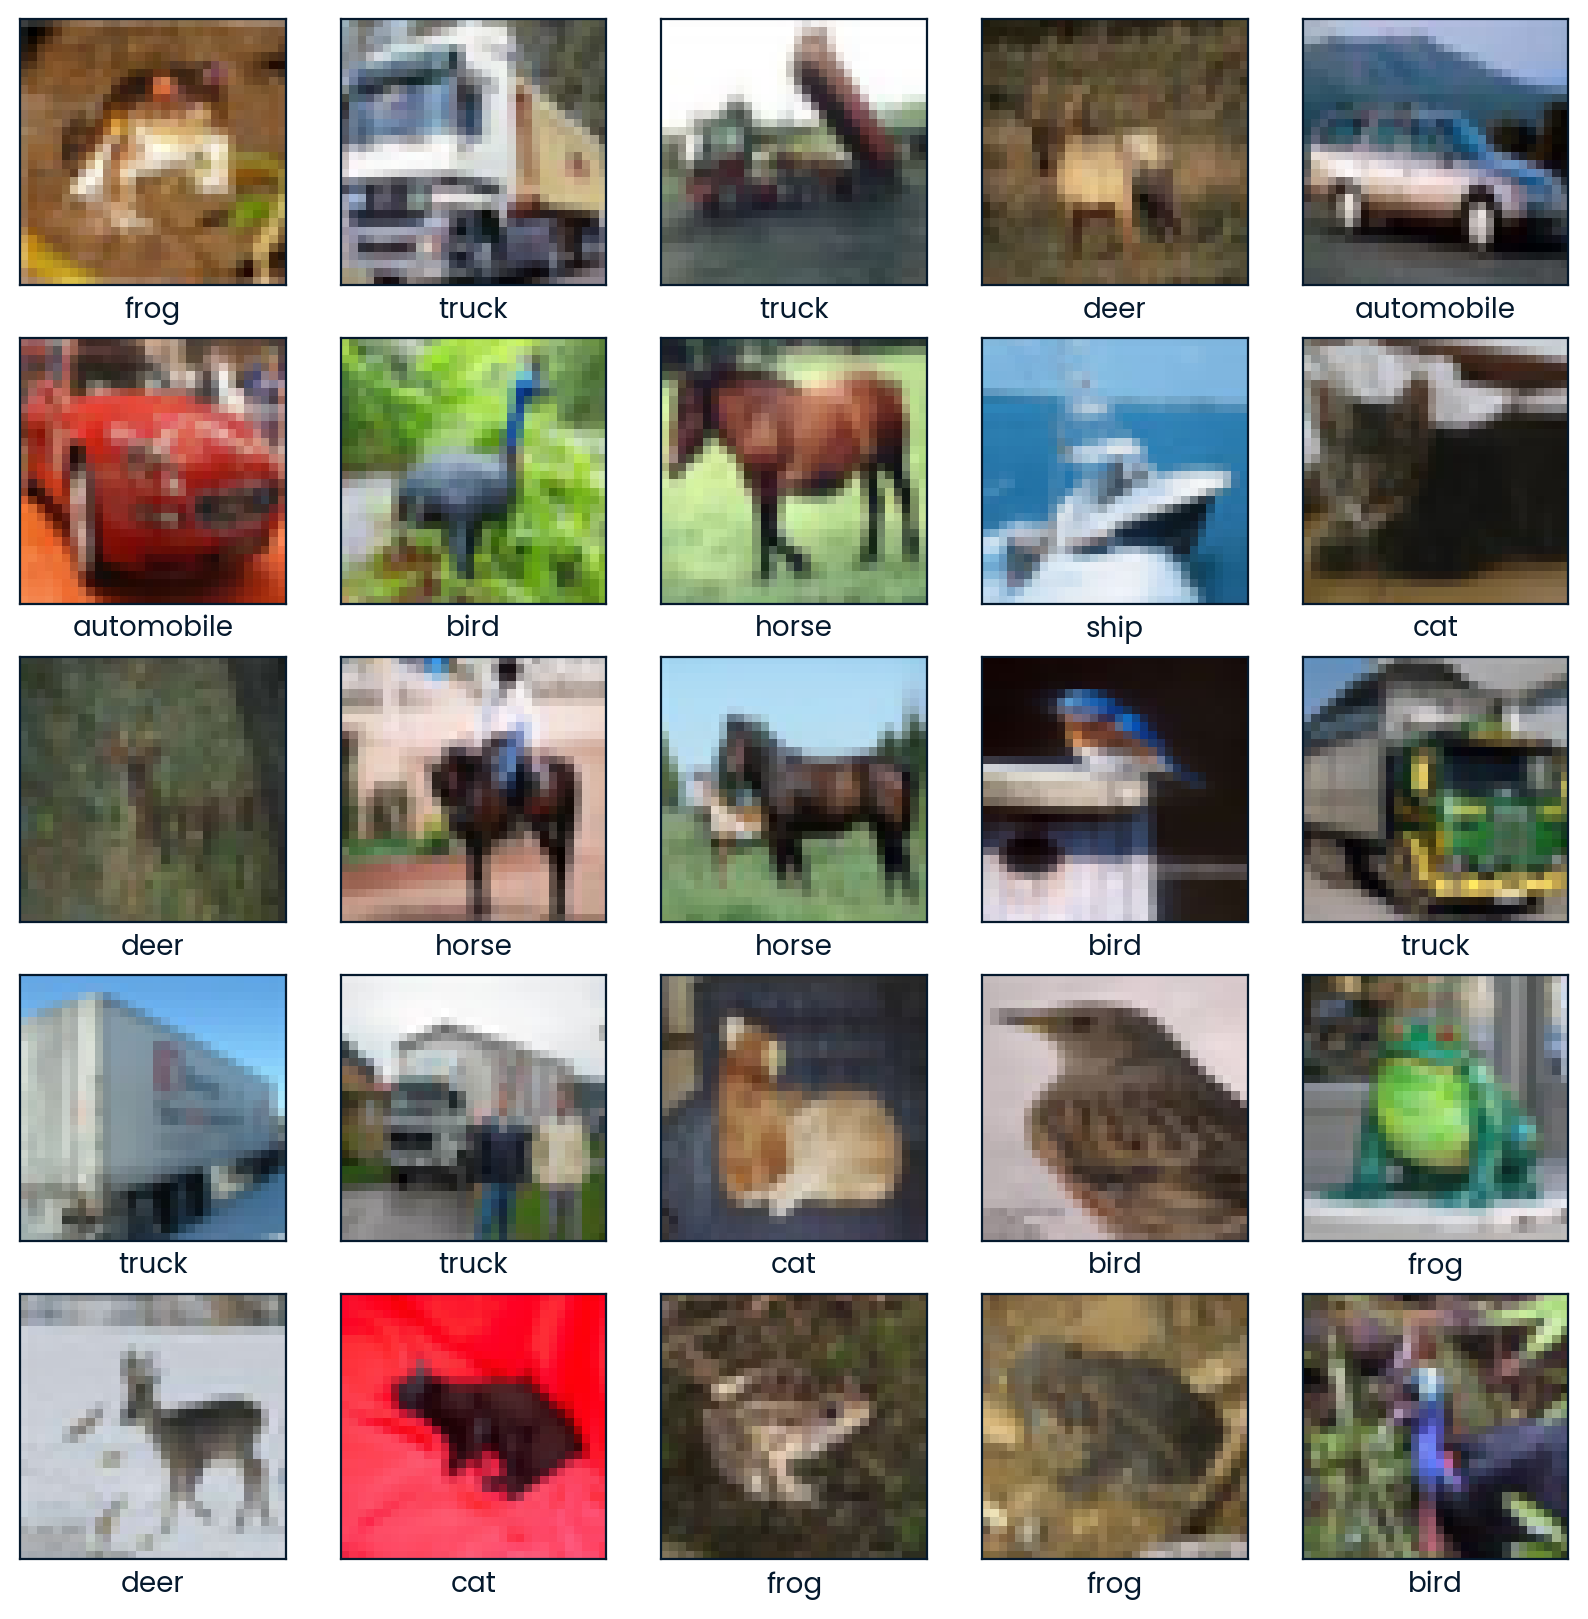

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

 #preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# cnn model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# compile, train, evaluate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.2606 - loss: 1.9639 - val_accuracy: 0.5040 - val_loss: 1.3678
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.4641 - loss: 1.4828 - val_accuracy: 0.5684 - val_loss: 1.2160
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5329 - loss: 1.3138 - val_accuracy: 0.6176 - val_loss: 1.0814
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5783 - loss: 1.1882 - val_accuracy: 0.6418 - val_loss: 1.0270
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6199 - loss: 1.0930 - val_accuracy: 0.6498 - val_loss: 0.9863
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6492 - loss: 1.0118 - val_accuracy: 0.6733 - val_loss: 0.9303
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.6669 - loss: 0.9634 - val_accuracy: 0.6697 - val_loss: 0.9358
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6815 -

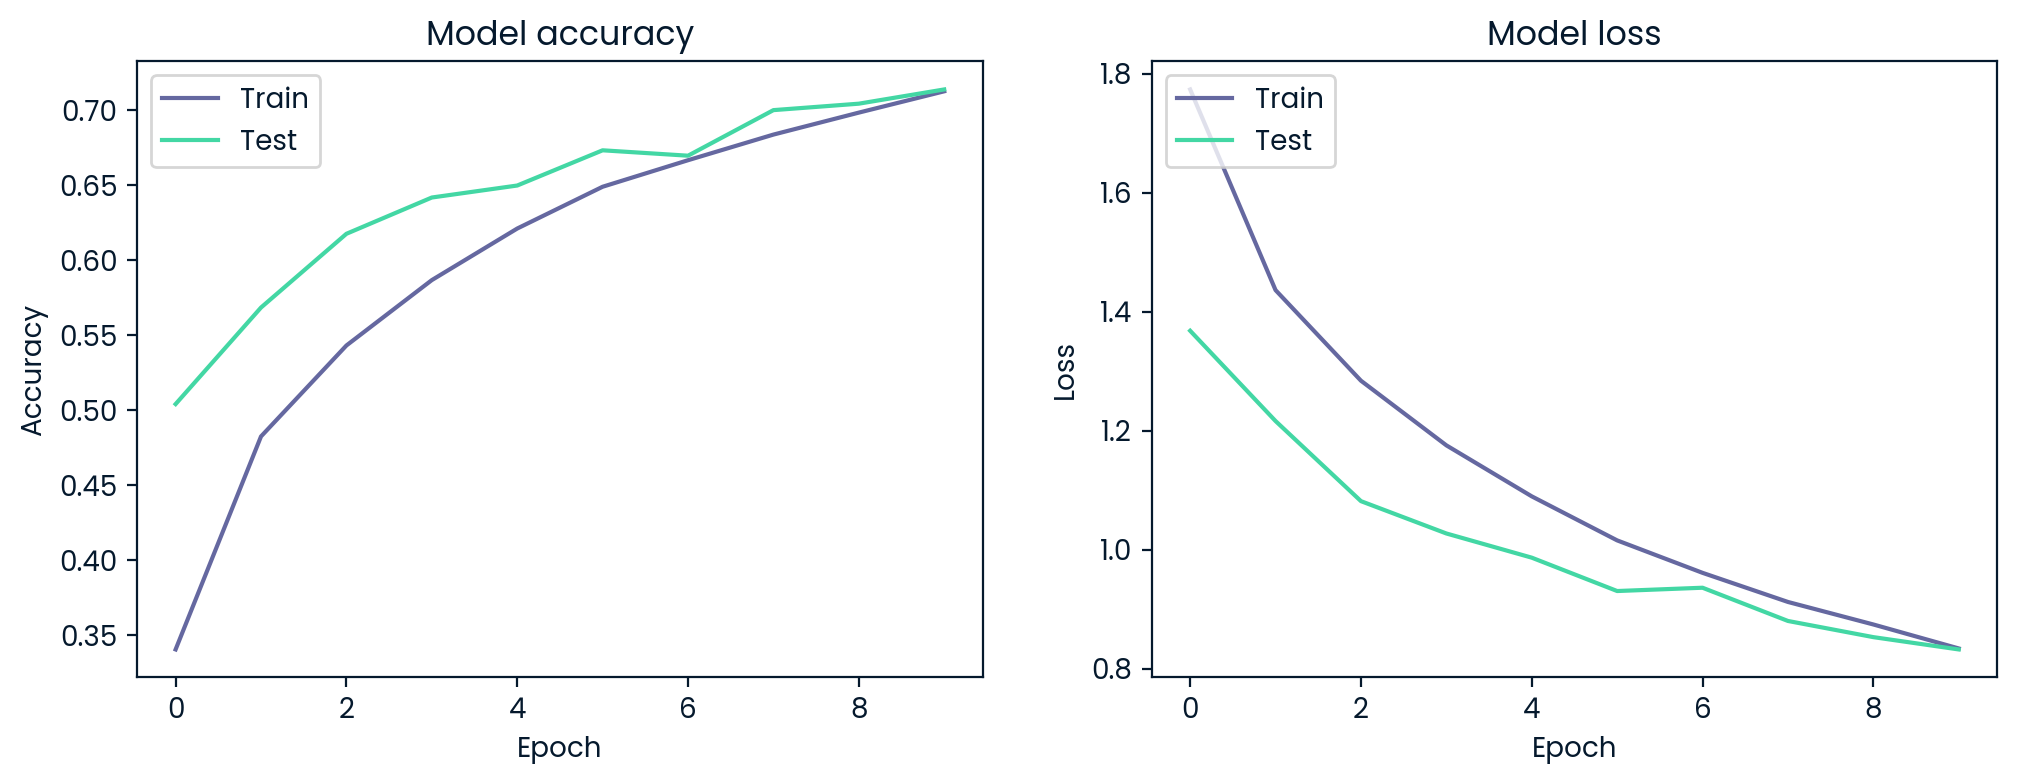

In [4]:
# train vs. validation acc.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# train vs. validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = 'path_to_your_image.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_height, img_width))  # Replace img_height and img_width with your model's input size

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image if your model expects normalized input

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Display the result
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


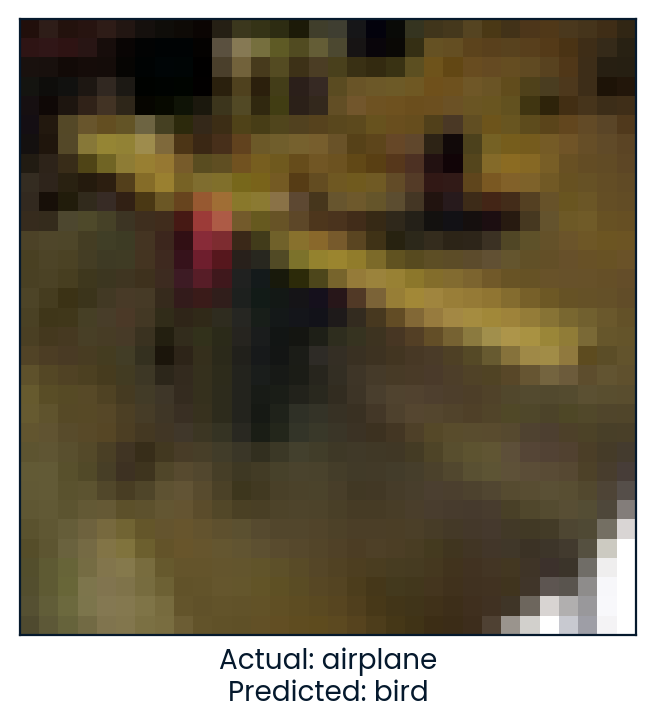

In [5]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


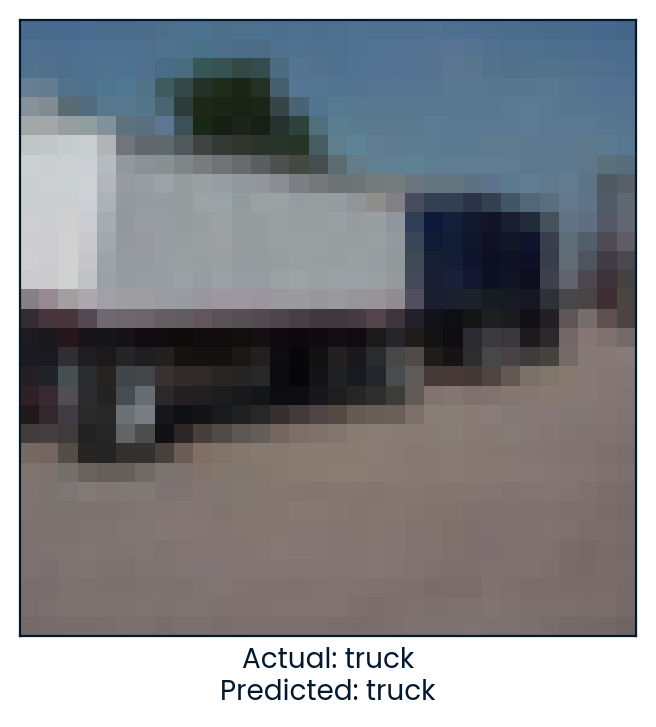

In [6]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


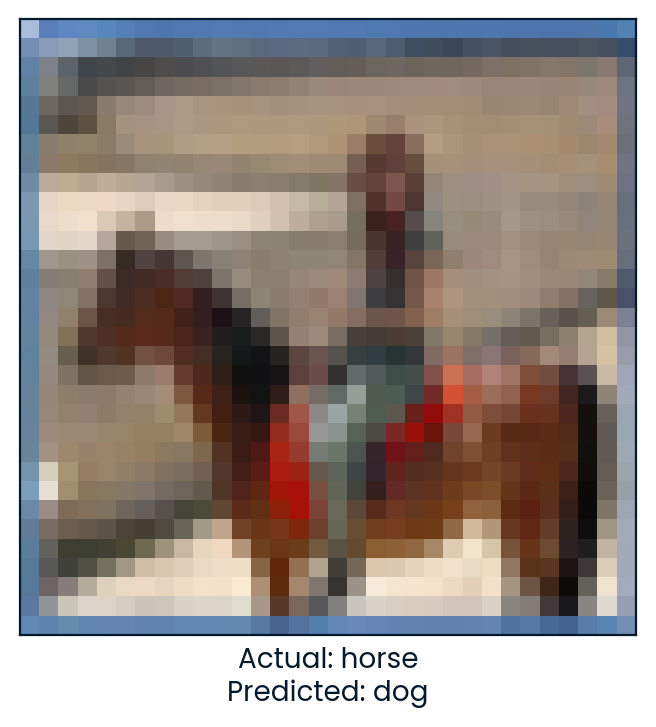

In [7]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


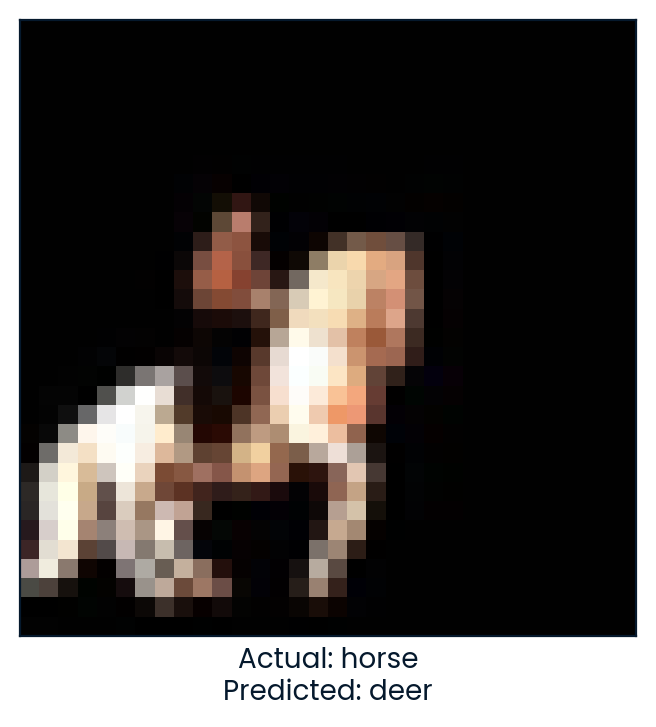

In [8]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


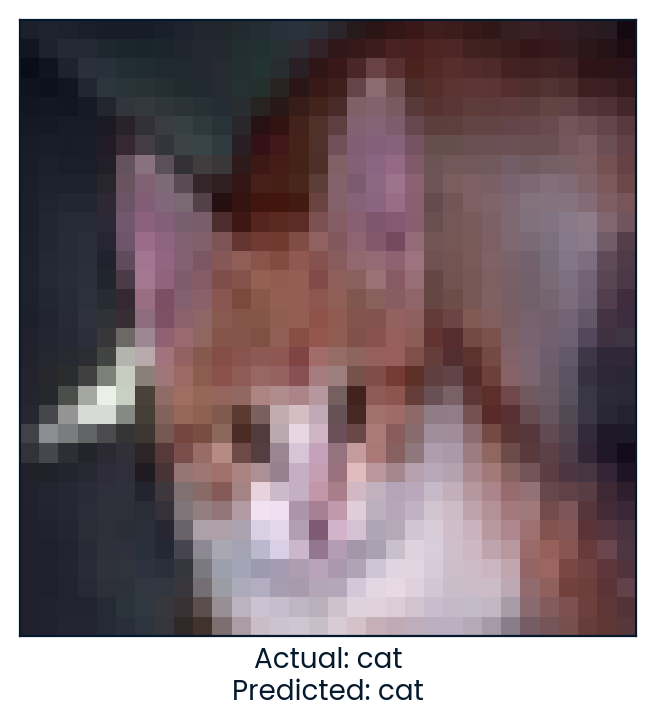

In [9]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


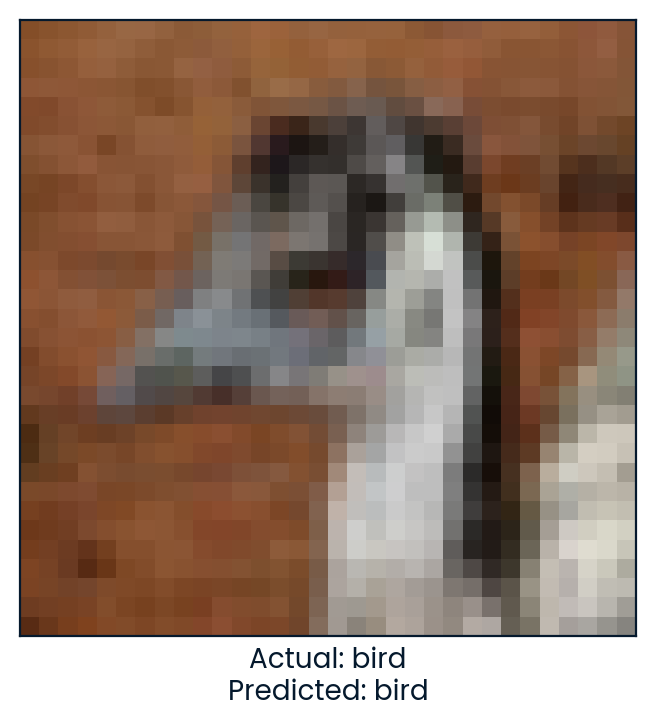

In [10]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


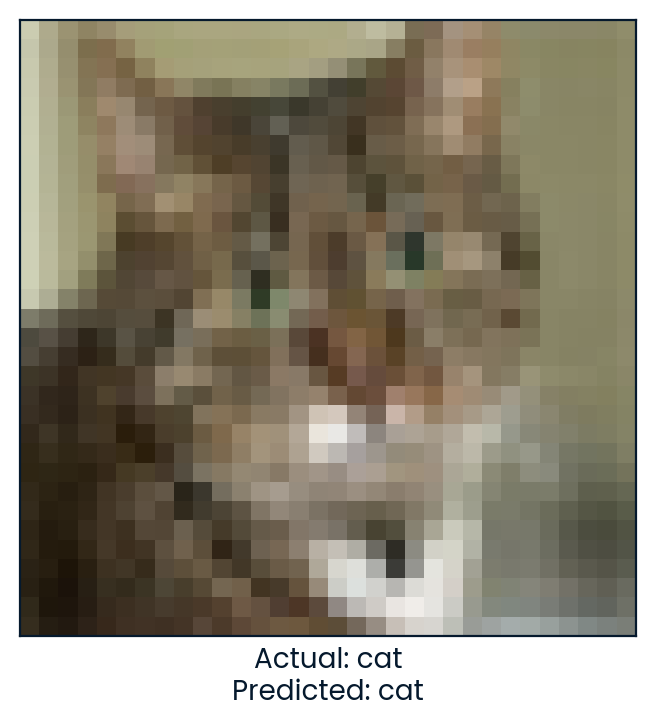

In [11]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


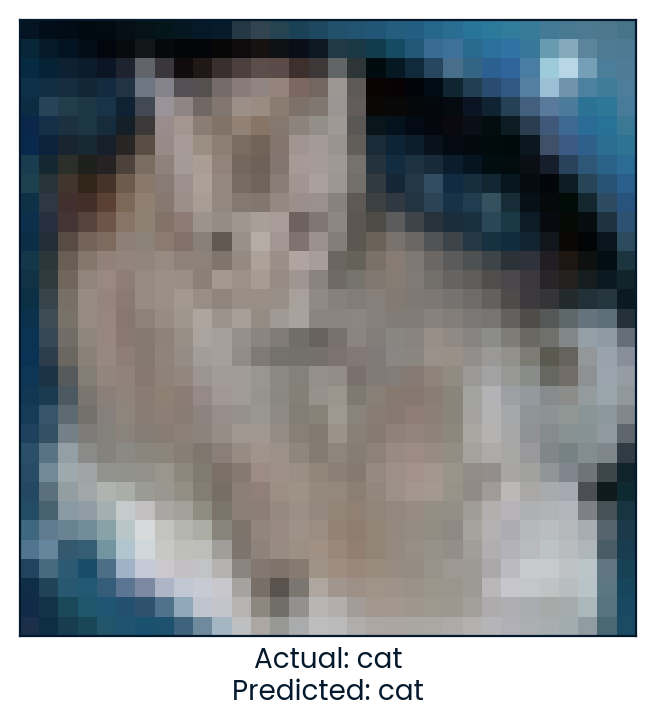

In [12]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


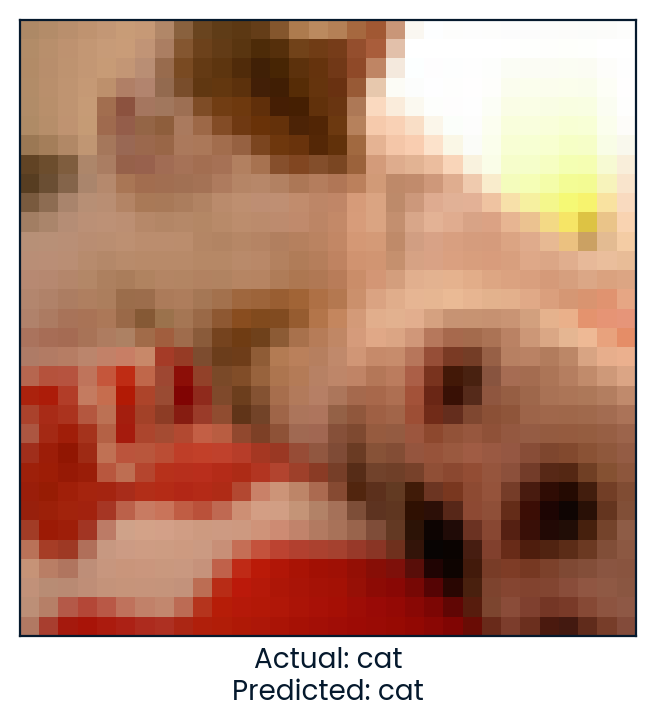

In [13]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


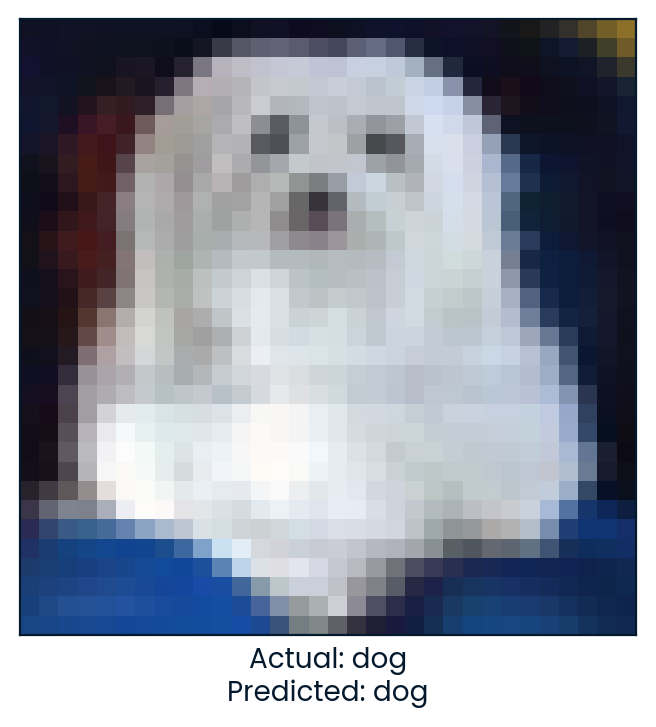

In [14]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


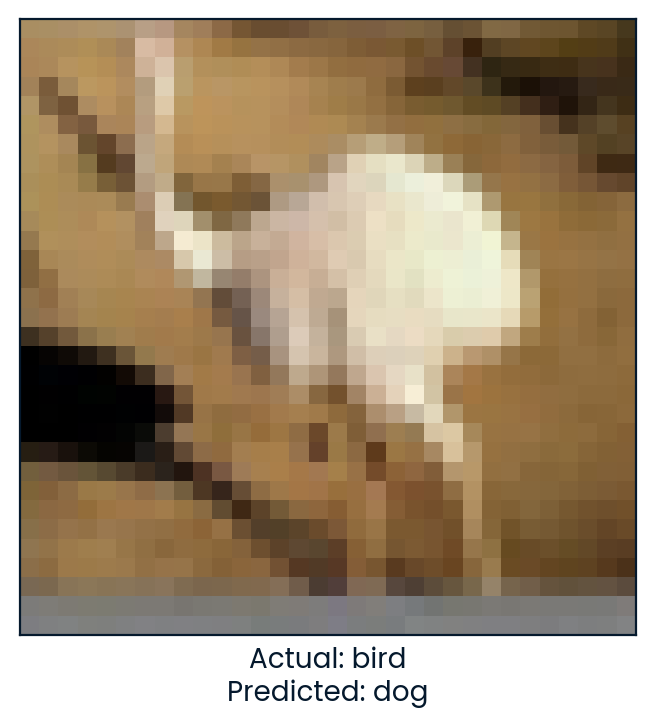

In [15]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


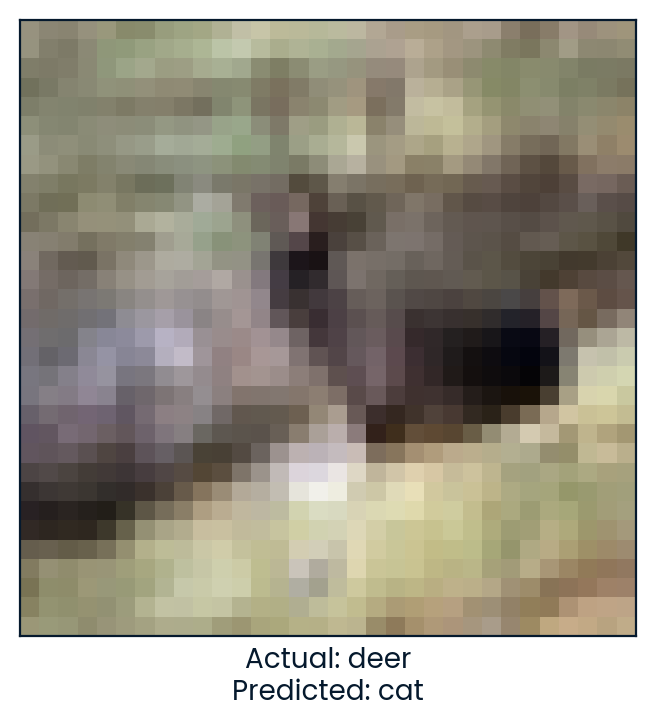

In [17]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


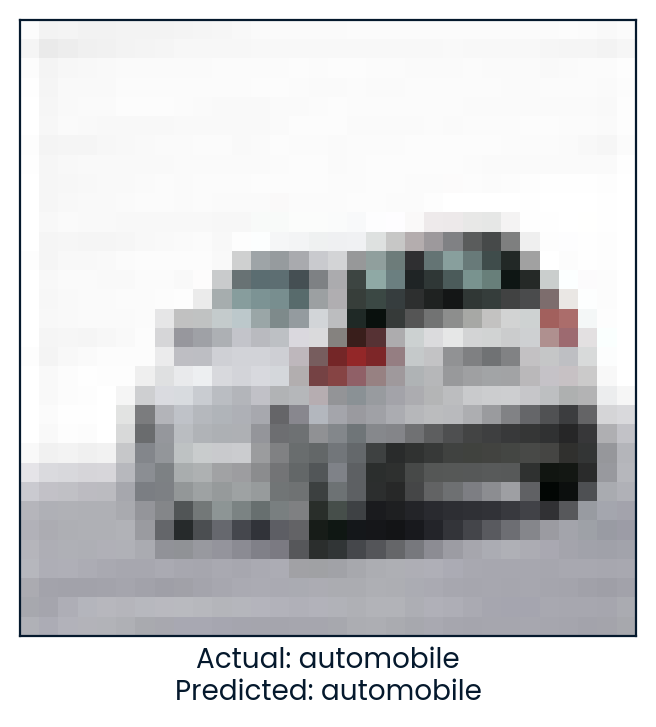

In [18]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


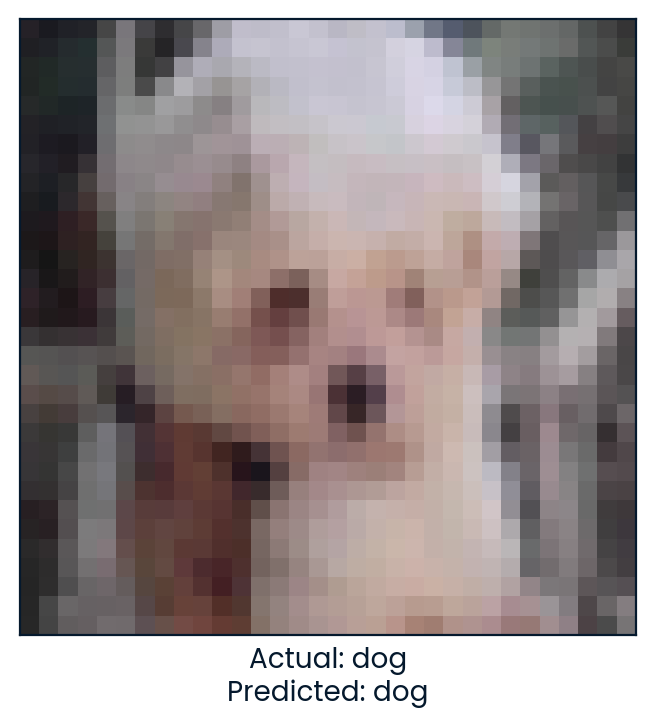

In [19]:
import numpy as np

random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
actual_label = np.argmax(y_test[random_index])

predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predicted_probabilities)

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(f'Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}')
plt.show()